# Viterbo Giuseppe 2086516

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats 

/home/vepe/miniconda3/envs/torch/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Ex. 1

## Coin Tosses
In order to simulate multiple coin tosses I created a list of N=1000 randomm numbers between 0 and 1, and if the numerb is lower than 0.3 than it is considered an Head (0), otherwise it is considered a Tail (1). 

In [2]:
N = 1000
a = npr.rand(N)
a[a >= 0.3]= 1
a[a < 0.3] = 0

coin_trail = np.array(a)

## Uniform prior
We are interested in the value of H, the probability of having and Head.

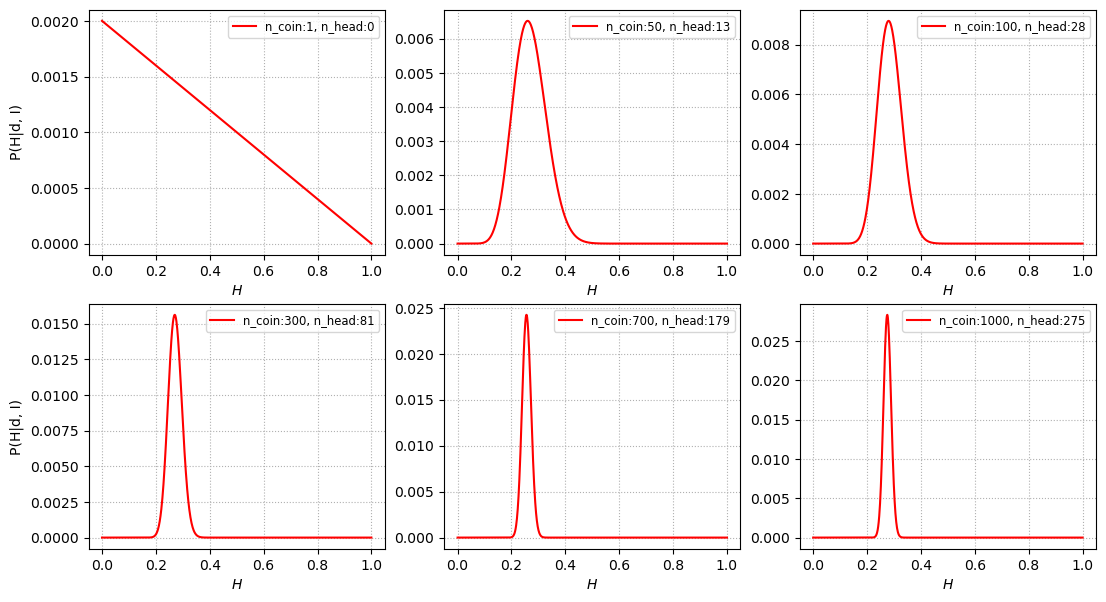

In [3]:
H = np.linspace(0, 1, 1000)
posterior_unif = []                                              #just a list that will be used later 

fig = plt.figure(figsize=(13, 7))
iplot = 230

for idx in range(len(coin_trail)+1):
    current_trail = coin_trail[:idx]                              
    num_success = len(current_trail[current_trail==0])
    posterior = (H**(num_success)) * ((1-H)**(idx-num_success)) * (np.ones(N))    #the prior is uniform so it is just a normalization constant
    posterior = posterior/np.sum(posterior)                                                            #normalization 
    
    if idx in [1, 50, 100, 300, 700, 1000]:
        iplot +=1
        ax = fig.add_subplot(iplot)
        ax.plot(H, posterior, label=f'n_coin:{idx}, n_head:{num_success}', color='red')
        ax.grid(linestyle='dotted')
        ax.set_xlabel('$H$')
        if idx in [1, 300]:
            ax.set_ylabel(r'P(H|d, I)')
        else:
            ax.set_ylabel('')
        ax.legend(fontsize='small')
        posterior_unif.append(posterior)

## Gaussian prior
We will use the `scipy.stats.norm.pdf` to create the PDF value that we will use as Prior

Text(0, 0.5, 'P(H|I)')

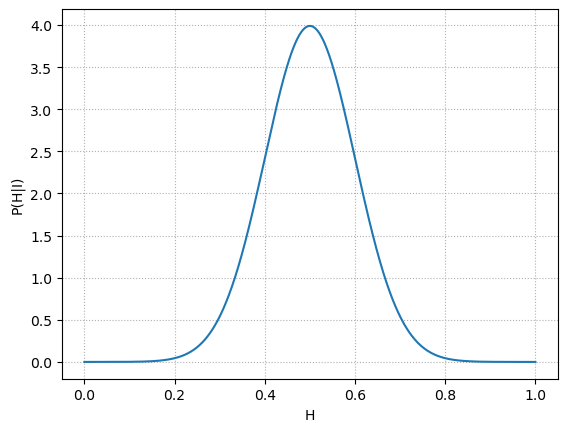

In [4]:
prior = scipy.stats.norm.pdf(H, loc=0.5, scale=0.1)

plt.plot(H, prior)
plt.grid(linestyle='dotted')
plt.xlabel('H')
plt.ylabel('P(H|I)')

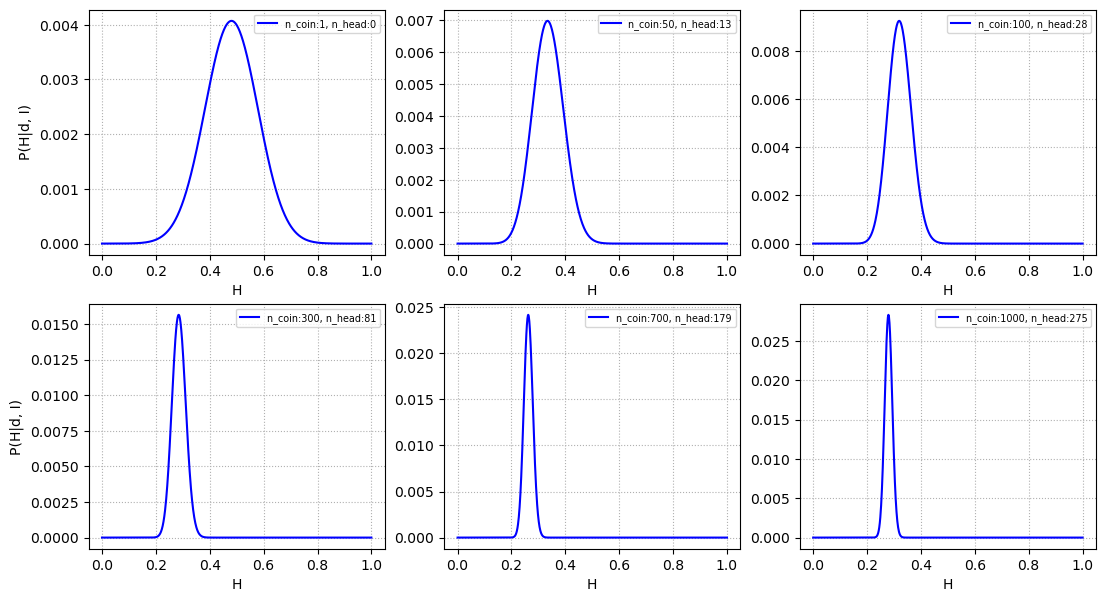

In [5]:
posterior_gauss = []

fig = plt.figure(figsize=(13, 7))
iplot = 230

for idx in range(len(coin_trail)+1):
    current_trial = coin_trail[:idx]
    num_success = len(current_trial[current_trial==0])
    likelihood = scipy.special.binom(N, num_success)*(H**num_success)*((1-H)**(idx-num_success))
    posterior = (likelihood * prior) / np.sum(likelihood*prior)        #here we create the prior and we also normalize it at the same time
    if idx in [1, 50, 100, 300, 700, 1000]:
        iplot +=1
        ax = fig.add_subplot(iplot)
        ax.plot(H, posterior, label=f'n_coin:{idx}, n_head:{num_success}', color='b')
        ax.set_xlabel('H')
        if idx in [1, 300]:
            ax.set_ylabel('P(H|d, I)')
        else:
            ax.set_ylabel('')
        ax.grid(linestyle='dotted')
        ax.legend(fontsize='x-small')
        
        posterior_gauss.append(posterior)

## Confronting convergence time

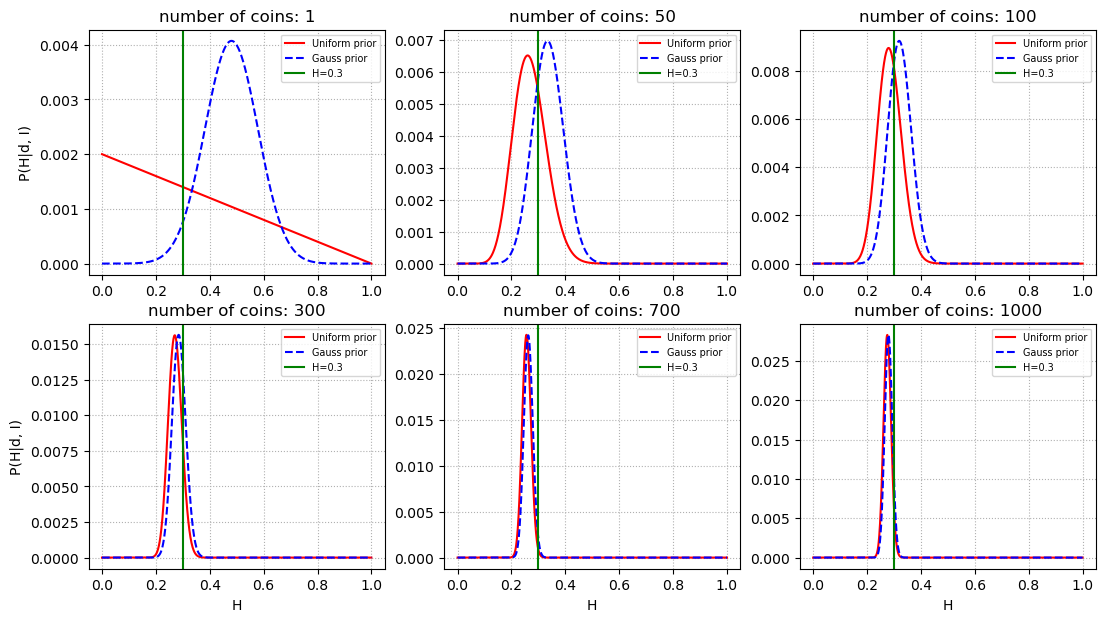

In [6]:
fig = plt.figure(figsize=(13, 7))
iplot = 230
tossed_coin = [1, 50, 100, 300, 700, 1000]
for i in range(len(posterior_gauss)):
    iplot += 1
    ax = fig.add_subplot(iplot)
    ax.plot(H, posterior_unif[i], label='Uniform prior', color='red')
    ax.plot(H, posterior_gauss[i], label='Gauss prior', linestyle='dashed', color='b')
    ax.axvline(x=0.3, label='H=0.3', color='g')
    if i > 2:
        ax.set_xlabel('H')
    if i in [0, 3]:
        ax.set_ylabel('P(H|d, I)')
    else:
        ax.set_ylabel('')
    ax.set_title(f'number of coins: {tossed_coin[i]}')
    ax.grid(linestyle='dotted')
    ax.legend(fontsize='x-small')

- Do both posteriors converge a similar distribution in the end? 
Yes, in the end both posterior converge to a bell shape distribution peaked around the true value H=0.3.
- What does that mean?
The fact that both posterior converge to the same distribution in the ends reflects the fact that the more data points (or records) you have the more important is the Likelihood with respect to the prior, as we can see from the fewer coin tosses at the beginning of the simulation. 
- Which posterior converges faster and why?
The posterior with the Gaussiann Likelihood is the one the converges faster since is the Unifor prior dosen't preferenciate a value of H with respect to the others, while the Gaussian gives more importans to values that are closer to the true one.

# Ex. 2

Let's begin by giving some nomenclature:
- P is posterior
- L is likelihood
- $\pi$ is prior

Since all the probability that we are gonna use are Binomial we are gonna use S, A, B as, respectevly, the probability of S beeing true, the probability of A beeing true, and the probability of B true. 

The exercise is divided into two parts:
1. P(S|A)
2. P(S|B), given P(S|A) as prior

## 1. P(S|A)
we can use the Bayes theorem as it is: $ P(S|A) = \frac{L(A=T|S=T)*\pi(S=T)}{\sum_S(L(A|S)*\pi(S))} = \frac{L(A=T|S=T)*\pi(S=T)}{L(A=T|S=T)*\pi(S=T) + L(A=T|S=F)*\pi(S=F)}$

We need also to consider the fact that $L(A=T|S=F)$ in the evidence is equivalent to say that A is lying, so $L(A=T|S=F) = L(A=F|S=T)$.

In [11]:
L_A_S = 4/5                                     #L(A=T|S=T)
pi_1 = 0.5                                      #pi(S=T)
evidence_1 = L_A_S * pi_1 + (1-L_A_S)*(1-pi_1)  #L(A=T|S=T)*pi(S=T) + L(A=F|S=T)*pi(S=F)
P_S_A = (L_A_S*pi_1/evidence_1)                         #P(S=T|A)
print('P(S=T|A) =', P_S_A)

P(S=T|A) = 0.8


## 2. P(S|A, B)
we can use bayes theorem: $P(S=T|B) = \frac{L(B=T|S=T)*\pi(S=T)}{\sum_{S} (L(B=T|S=T)*\pi(S=T))} = \frac{L(B=T|S=T)*P(S=T|A)}{L(A=T|S=T)*P(S=T|A) + L(B=T|S=F)*P(S=F|A))} $

where we have use the previous posterior as Prior for our data, and we will use the fact that $L(B=T|S=F) = L(B=F|S=T)$.

In [13]:
L_B_S = 1/4                                #P(S=T|B)
pi_2 = P_S_A                               #prior = P(S|A) old posterio                                  
evidence_2 = (L_B_S*pi_2) + (1-L_B_S)*(1-pi_2)   
P_S_B = (L_B_S*pi_2/evidence_2)                #P(S=T|B)
print(f'P(S|B) = {P_S_B:.2f}')

P(S|B) = 0.57


# Ex.3
first some nomencalture:
- B=1 means that you have the virus
- T=1 means that the test for the virus is positive 

we can use Bayes's Theorem:

$P(B=1|T=1) = \frac{P(T=1|B=1)*P(B=1)}{P(T=1|B=1)*P(B=1) + P(T=1|B=0)*P(B=0)} $

where:
- $P(T=1|B=1) =  1-P(T=0|B=1) = 1-5\%$  is the probability of true positive (1-probability of false negative)
- $P(T=1|B=0) = 5\%$ is the false positive probability 
- $P(B=1) = 1\%$

In [18]:
P_nT_B = 0.05        #false negative 
P_T_nB = 0.05        #false positive
P_B = 0.01           #probability of having the virus

P_T_B = 1 - P_nT_B
P_nB = 1 - P_B

P_B_T = (P_T_B*P_B)/( (P_T_B*P_B) + (P_T_nB*P_nB) )
print(f'Probability of having the virus if the test knowing that the test is positive: {P_B_T:.2f}')

Probability of having the virus if the test knowing that the test is positive: 0.16
